In [1]:
import os
import json
from recordtype import recordtype
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters
import pathlib
plt.rc('text', usetex=True)

import dadrah.util.data_processing as dapr
import dadrah.selection.qr_workflow as qrwf

In [2]:
params_t = recordtype('Parameters','qr_run_n, env_n, sig_sample_id, sig_xsec, poly_order, kfold_n')
params = params_t(qr_run_n = 402, env_n=4020, sig_sample_id='GtoWW35naReco', sig_xsec=0, poly_order=5, kfold_n=5) 
quantiles = [0.3, 0.5, 0.7, 0.9]

In [3]:
envelope_dir = '/eos/user/k/kiwoznia/data/QR_results/analysis/vae_run_113/qr_run_'+str(params.qr_run_n)+'/sig_GtoWW35naReco/xsec_'+str(params.sig_xsec)+'/loss_rk5_05/envelope'
if params.env_n is not None:
    envelope_dir = envelope_dir + '_' + str(params.env_n)
polys_json_path = os.path.join(envelope_dir, 'polynomials_allQ_allFolds_'+ params.sig_sample_id + '_xsec_' + str(params.sig_xsec) + '.json')
fig_dir = '../fig/env_analysis/'+ ('env_'+str(params.env_n) if params.env_n else 'qr_'+str(params.qr_run_n))+'/'
pathlib.Path(fig_dir).mkdir(parents=True, exist_ok=True)   

## read envelope

In [4]:
bin_idx, mu_idx, rmse_idx, min_idx, max_idx = range(5)

envelope_per_fold = {}
for k in range(params.kfold_n+1):
    envelope_json_path = os.path.join(envelope_dir, 'cut_stats_allQ_fold'+str(k+1)+'_'+ params.sig_sample_id + '_xsec_' + str(params.sig_xsec) + '.json')
    ff = open(envelope_json_path)
    envelope_per_fold['fold_{}'.format(k+1)] = json.load(ff)
    
envelope_tmp = np.asarray(envelope_per_fold['fold_1'][str(quantiles[0])]) 
x_shift = envelope_tmp[0,bin_idx]
bins = envelope_tmp[:,bin_idx]

In [5]:
bins

array([1200., 1255., 1320., 1387., 1457., 1529., 1604., 1681., 1761.,
       1844., 1930., 2019., 2111., 2206., 2305., 2406., 2512., 2620.,
       2733., 2849., 2969., 3093., 3221., 3353., 3490., 3632., 3778.,
       3928., 4084., 4245., 4411., 4583., 4760., 4943., 5132., 5327.,
       5574., 5737., 5951., 6173., 6402., 6638., 6882.])

In [6]:
bins_n = len(bins)

In [7]:
bins_n

43

In [8]:
arr_tmp = np.empty([0,bins_n])

In [9]:
envelope_tmp[np.newaxis,:,min_idx]

array([[1.5304172 , 1.56350183, 1.59617662, 1.6254822 , 1.65600801,
        1.68770182, 1.72158098, 1.75785363, 1.7976228 , 1.84143949,
        1.88970399, 1.94268847, 2.0006032 , 2.06367707, 2.13293815,
        2.20740795, 2.28988171, 2.37866592, 2.47687578, 2.58342409,
        2.69968081, 2.82599783, 2.96252155, 3.10918617, 3.26689148,
        3.43529034, 3.61263657, 3.79822111, 3.99381399, 4.19743633,
        4.40834761, 4.62711763, 4.85183764, 5.08321476, 5.32077169,
        5.56412363, 5.86964464, 6.06751442, 6.31231833, 6.56527328,
        6.82532072, 7.09255362, 7.3681941 ]])

In [10]:
arr_tmp = np.append(arr_tmp, envelope_tmp[np.newaxis,:,min_idx], axis=0)
arr_tmp = np.append(arr_tmp, envelope_tmp[np.newaxis,:,min_idx], axis=0)

In [11]:
np.mean(arr_tmp,axis=0)

array([1.5304172 , 1.56350183, 1.59617662, 1.6254822 , 1.65600801,
       1.68770182, 1.72158098, 1.75785363, 1.7976228 , 1.84143949,
       1.88970399, 1.94268847, 2.0006032 , 2.06367707, 2.13293815,
       2.20740795, 2.28988171, 2.37866592, 2.47687578, 2.58342409,
       2.69968081, 2.82599783, 2.96252155, 3.10918617, 3.26689148,
       3.43529034, 3.61263657, 3.79822111, 3.99381399, 4.19743633,
       4.40834761, 4.62711763, 4.85183764, 5.08321476, 5.32077169,
       5.56412363, 5.86964464, 6.06751442, 6.31231833, 6.56527328,
       6.82532072, 7.09255362, 7.3681941 ])

In [12]:
for k in range(params.kfold_n+1):
    envelope_q = np.asarray(envelope_per_fold['fold_{}'.format(k+1)])
    print(envelope_q)

{'0.3': [[1200.0, 1.5395013988018036, 0.005381812904801488, 1.5304172039031982, 1.5438975095748901], [1255.0, 1.5686032176017761, 0.0036368558928417316, 1.5635018348693848, 1.5734983682632446], [1320.0, 1.599869042634964, 0.0032523342823862246, 1.5961766242980957, 1.6035653352737427], [1387.0, 1.630529761314392, 0.0037849283188752564, 1.625482201576233, 1.6358075141906738], [1457.0, 1.6630816459655762, 0.00550809489951588, 1.656008005142212, 1.6714739799499512], [1529.0, 1.698653757572174, 0.007947017803460951, 1.6877018213272095, 1.7101026773452759], [1604.0, 1.738137274980545, 0.01105464207463389, 1.721580982208252, 1.752586841583252], [1681.0, 1.7803776264190674, 0.014574643966391021, 1.757853627204895, 1.7981826066970825], [1761.0, 1.8252925276756287, 0.018105726212422173, 1.797622799873352, 1.8471133708953857], [1844.0, 1.8729637563228607, 0.02132415492910197, 1.8414394855499268, 1.899205207824707], [1930.0, 1.9240285158157349, 0.024002630928982246, 1.8897039890289307, 1.954653620

## plotting functions

In [13]:
def plot_envelope_uncerts(envelope_per_fold, quantiles, params):
    
    bin_idx, mu_idx, rmse_idx, min_idx, max_idx = range(5)
    
    fig, axs = plt.subplots(1, params.kfold_n+1, figsize=(30,4), sharex=True, sharey=True)
    
    for k, ax in zip(range(params.kfold_n+1), axs.flat):
        
        envelope_fold = envelope_per_fold['fold_{}'.format(k+1)]
    
        for q in quantiles:
            
            envelope_q = np.asarray(envelope_fold[str(q)])
            
            x = envelope_q[:,bin_idx]
            y = (envelope_q[:,max_idx]-envelope_q[:,min_idx])/envelope_q[:,mu_idx]
            
            ax.plot(x, y, lw=1.5, label='Q '+str(q))
            ax.set_yscale('log')
            
        ax.set_title('fold {}'.format(k+1))
        ax.legend()
        ax.grid()
        ax.set_xlabel('mJJ')
        axs.flat[0].set_ylabel(r'$\frac{\textrm{max}-\textrm{min}}{\mu}$')
        #ax.set_xlim(right=5000)
        #ax.set_ylim(top=0.1)
        
    plt.savefig(fig_dir+'relative_uncertainty_quantiles.pdf')
    plt.show()

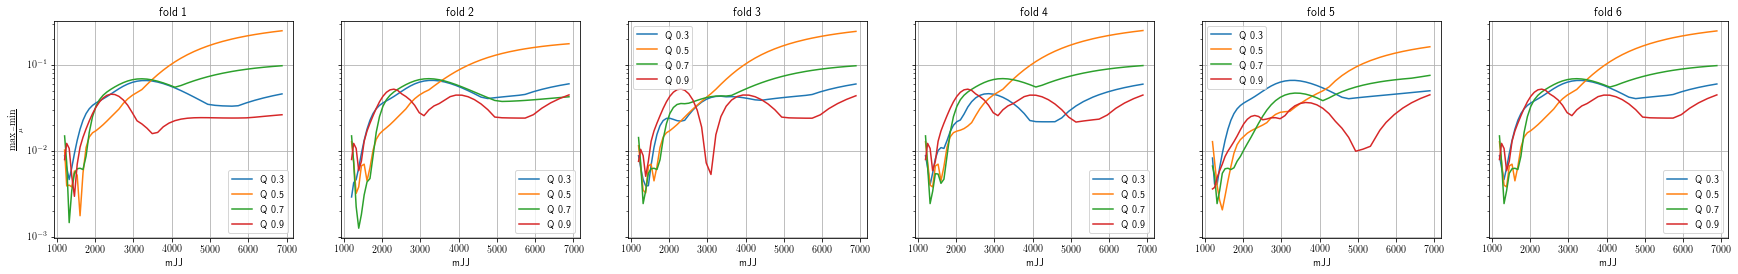

In [14]:
plot_envelope_uncerts(envelope_per_fold, quantiles, params)

In [15]:
def calc_relative_uncertainties(envelope_per_fold, quantiles, params):
    
    bin_idx, mu_idx, rmse_idx, min_idx, max_idx = range(5)
    rel_uncert_per_fold = {}
    
    for k in range(params.kfold_n+1):
        
        envelope_fold = envelope_per_fold['fold_{}'.format(k+1)]
        rel_uncert_per_quant = {}
    
        for q in quantiles:
            
            envelope_q = np.asarray(envelope_fold[str(q)])
            
            uncert = (envelope_q[:,max_idx]-envelope_q[:,min_idx])/envelope_q[:,mu_idx]
                        
            rel_uncert_per_quant[str(q)] = uncert
            
        rel_uncert_per_fold['fold_{}'.format(k+1)] = rel_uncert_per_quant
            
    return rel_uncert_per_fold

In [16]:
rel_uncert_per_fold = calc_relative_uncertainties(envelope_per_fold, quantiles, params)

In [17]:
rel_uncert_per_fold['fold_1']['0.3']

array([0.00875628, 0.00637289, 0.00461832, 0.00633249, 0.00929959,
       0.01318742, 0.01783856, 0.02265192, 0.02711378, 0.03084188,
       0.0337571 , 0.03605587, 0.03808911, 0.04021983, 0.04273958,
       0.04570535, 0.04915443, 0.05280622, 0.05649076, 0.05984585,
       0.06262983, 0.06462473, 0.06569237, 0.06578054, 0.06490521,
       0.06313778, 0.06062141, 0.05752071, 0.05395991, 0.05012592,
       0.04617348, 0.04221629, 0.03839078, 0.03476542, 0.03381282,
       0.03333257, 0.0330825 , 0.03345005, 0.03613431, 0.03874386,
       0.04125499, 0.04365995, 0.04596281])

In [18]:
def calc_uncertainty_band_per_quantile(uncert_per_fold, quantiles, params, bins):
    
    bin_idx, mu_idx, rmse_idx, min_idx, max_idx = range(5)
    
    uncert_band_per_quantile = {}
    
    for q in quantiles:
        
        uu = np.empty([0, len(bins)])
        
        for k in range(params.kfold_n):
        
            uncert_fold = uncert_per_fold['fold_{}'.format(k+1)]     
            uncert_q = np.asarray(uncert_fold[str(q)])
            
            uu = np.append(uu, uncert_q[np.newaxis,:], axis=0)
            
        min_all_folds = np.min(uu, axis=0).tolist()
        max_all_folds = np.max(uu, axis=0).tolist()
        mu_all_folds = np.mean(uu, axis=0).tolist()
        
        uncert_band_per_quantile[str(q)] = (min_all_folds, max_all_folds, mu_all_folds)
        
    return uncert_band_per_quantile

In [19]:
def plot_uncertainty_band_per_quantile(uncert_band_per_quantile, quantiles, params, bins):
    
    bin_idx, mu_idx, rmse_idx, min_idx, max_idx = range(5)
    
    fig, axs = plt.subplots(1, len(quantiles), figsize=(20,4), sharex=True, sharey=True)
    
    for q, ax in zip(quantiles, axs.flat):
        
        mins, maxs, mus = uncert_band_per_quantile[str(q)]
            
        ax.plot(bins, mus, lw=1.5)
        ax.fill_between(bins, mins, maxs, alpha=0.4, linewidth=0)
        ax.set_yscale('log')
            
        ax.set_title('Q {}'.format(q))
        ax.grid(True, linestyle='dotted',linewidth=0.5)
        ax.set_xlabel('mJJ')
        axs.flat[0].set_ylabel('min \& max around mu')
        #ax.set_xlim(right=4000)
        #ax.set_ylim(top=3)
        
    plt.savefig(fig_dir+'uncertainty_band_quantiles.pdf')
    plt.show()

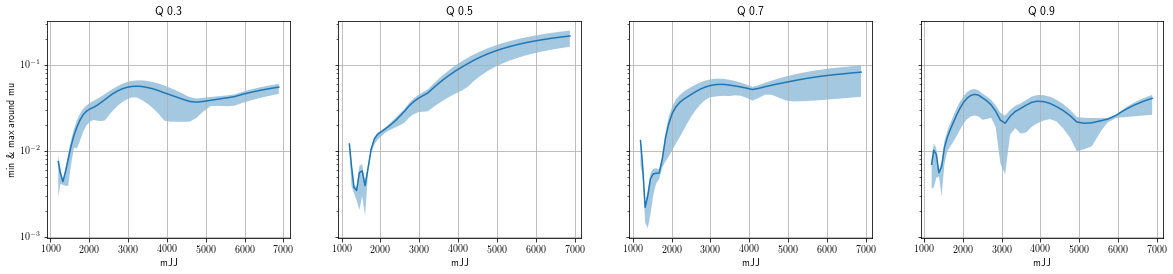

In [20]:
uncert_band_per_quantile = calc_uncertainty_band_per_quantile(rel_uncert_per_fold, quantiles, params, bins)
plot_uncertainty_band_per_quantile(uncert_band_per_quantile, quantiles, params, bins)

In [92]:
uncert_path = os.path.join(envelope_dir, 'uncertainties_allQ_'+ params.sig_sample_id + '_xsec_' + str(params.sig_xsec) + '.json')
with open(uncert_path, 'w') as ff:
    json.dump(uncert_band_per_quantile, ff)

In [93]:
uncert_path

'/eos/user/k/kiwoznia/data/QR_results/analysis/vae_run_113/qr_run_32/sig_GtoWW35naReco/xsec_0/loss_rk5_05/envelope/uncertainties_allQ_GtoWW35naReco_xsec_0.json'